Extracted Text from Third Page:
 « V. – La politique en faveur de l’agriculture et de l’alimentation tient compte des spécificités des outre-mer 
ainsi que de l’ensemble des enjeux économiques, sociaux et environnementaux de ces territoires. Elle a pour 
objectif de favoriser le développement des productions agricoles d’outre-mer, en soutenant leur accès aux marchés, 
la recherche et l’innovation, l’organisation et la modernisation de l’agriculture par la structuration en filières 
organisées compétitives et durables, l’emploi, la satisfaction de la demande alimentaire locale par des productions 
locales, le développement des énergies renouvelables, des démarches de qualité particulières et de l’agriculture 
familiale, ainsi que de répondre aux spécificités de ces territoires en matière de santé des animaux et des végétaux. 
« VI. – La politique en faveur de l’agriculture et de l’alimentation tient compte des spécificités des territoires de 
montagne, en application de l’article 8 de l

Topic 0: 0.021*"development" + 0.021*"modified" + 0.021*"article" + 0.021*"words"
Topic 1: 0.049*"article" + 0.025*"development" + 0.025*"law" + 0.025*"food"
Topic 2: 0.027*"agriculture" + 0.027*"food" + 0.027*"territories" + 0.027*"overseas"
Topic 3: 0.051*"forest" + 0.041*"wood" + 0.031*"balance" + 0.021*"code"
Topic 4: 0.037*"sentence" + 0.020*"word" + 0.020*"words" + 0.020*"modified"
Topic 5: 0.034*"policy" + 0.034*"art" + 0.019*"july" + 0.019*"orientation"


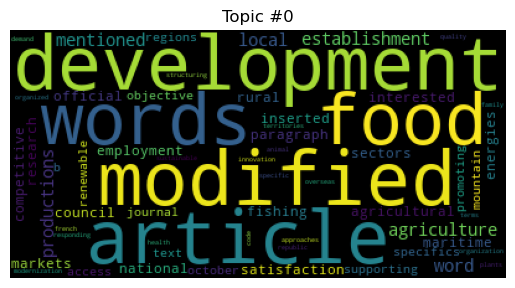

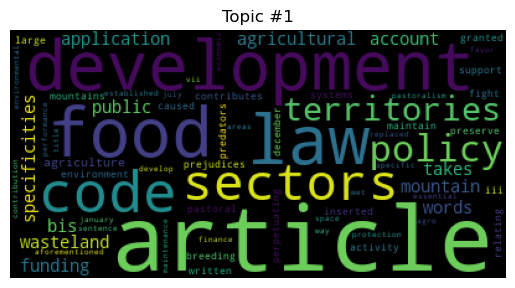

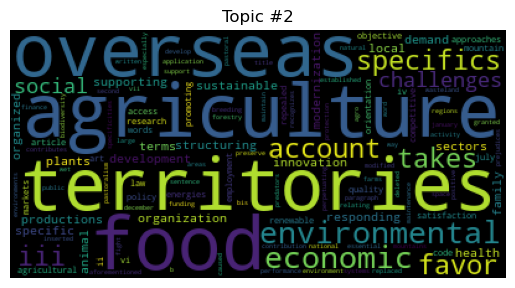

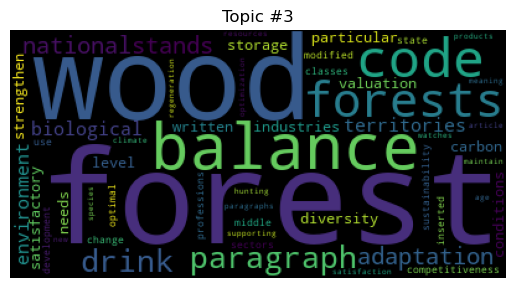

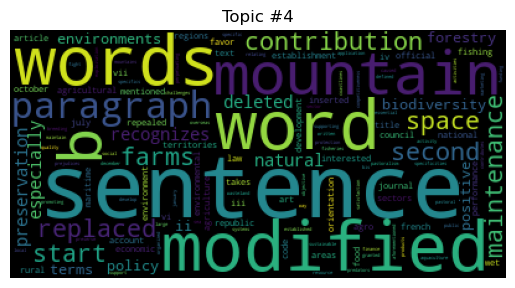

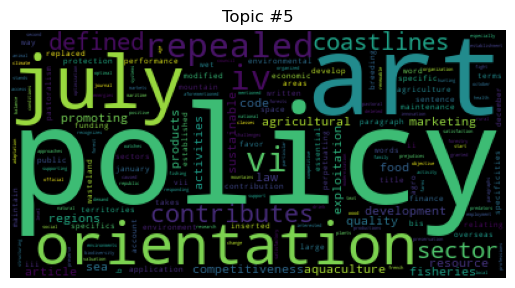

In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from googletrans import Translator
import spacy
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from wordcloud import WordCloud



# Load spaCy's English model
nlp_en = spacy.load('en_core_web_sm')

# Function to extract text from the third page of a PDF file
def pdf_to_text_third_page(pdf_path):
    doc = fitz.open(pdf_path)
    if len(doc) < 3:
        raise ValueError("The PDF does not contain a third page.")
    third_page = doc.load_page(2)
    text = third_page.get_text()
    if text is None:
        raise ValueError("No text found on the third page.")
    return text

# Function to translate a list of sentences from French to English
def translate_sentences(sentences, src_language='fr', dest_language='en'):
    translator = Translator()
    translated_sentences = []
    for sentence in sentences:
        translated = translator.translate(sentence, src=src_language, dest=dest_language)
        translated_sentences.append(translated.text)
    return translated_sentences

# Function to preprocess English sentences
def preprocess_english_sentences(sentences):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    processed_sentences = []
    for sentence in sentences:
        doc = nlp_en(sentence.lower())
        words = [token.text for token in doc if token.is_alpha and not token.is_stop]
        processed_sentences.append(words)
    return processed_sentences

# Example usage
pdf_path = '/Users/jenniferbadger/Dropbox/AI_course/NLP project/joe_20141014_0238_0001.pdf'

try:
    third_page_text = pdf_to_text_third_page(pdf_path)
    print("Extracted Text from Third Page:\n", third_page_text)
except ValueError as e:
    print(e)
    third_page_text = ""

# Save the extracted text to a file
if third_page_text:
    txt_filename = 'third_page_LeLoi.txt'
    with open(txt_filename, 'w', encoding='utf-8') as file:
        file.write(third_page_text)

    # Split the extracted text into sentences
    french_sentences = sent_tokenize(third_page_text)
    
    # Translate the French sentences to English
    translated_sentences = translate_sentences(french_sentences)
    print("Translated Sentences:", translated_sentences)

    # Preprocess the translated English sentences
    processed_english_sentences = preprocess_english_sentences(translated_sentences)
    print("Processed English Sentences:", processed_english_sentences)

    # Create a dictionary and corpus for the LDA model
    dictionary = corpora.Dictionary(processed_english_sentences)
    corpus = [dictionary.doc2bow(sentence) for sentence in processed_english_sentences]

    # Build the LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=6, id2word=dictionary, passes=15)

    # Print the topics
    for idx, topic in lda_model.print_topics(num_words=4):
        print(f"Topic {idx}: {topic}")

    # Visualize the topics using WordCloud and Matplotlib
    for t in range(lda_model.num_topics):
        plt.figure()
        plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
        plt.axis("off")
        plt.title(f"Topic #{t}")
        plt.show()